#                               Research on car sales ads


We are making an analysis for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. Using the data on 500 Megaline clients, we need to find out which plan brings in more revenue.
We have 5 datasets - calls, internet usage, message usage, plans descriptions, information about users.
#### Let's move on and study the data more thorougly.    

In [1]:
!pip install seaborn -U

     |████████████████████████████████| 292 kB 1.3 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from scipy import stats

In [3]:
try:
    megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
except IOError as e:
    print(e)

In [4]:
try:
    megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
except IOError as e:
    print(e)

In [5]:
try:
    megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
except IOError as e:
    print(e)

In [6]:
try:
    megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
except IOError as e:
    print(e)

In [7]:
try:
    megaline_users = pd.read_csv('/datasets/megaline_users.csv')
except IOError as e:
    print(e)

First of all, I want to see what kind of data do I have. We downloaded 5 files, containing
- informtaion about plans
- information about users
- information about:
              calls made
              messages sent 
              internet used


In [8]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [9]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [10]:
megaline_users['churn_date'].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

We see that there are a lot of missing data in column churn_date. In my opinion that rows without dates are the ones, who are using megaline on the date of analysis. We can't replaci it by "0" or other date. As we are not going to use this column in our analysis, I think it is a better idea not to change it.

In [11]:
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
megaline_calls.sample(5)

,id,user_id,call_date,duration
21281,1078_24,1078,2018-12-17,0.00
12363,1054_86,1054,2018-05-23,0.00
76717,1274_22,1274,2018-12-31,9.96
115315,1404_109,1404,2018-09-27,14.36
73442,1261_195,1261,2018-08-08,4.49


In [13]:
(megaline_calls['duration'] == 0).sum()/len(megaline_calls)*100

19.482339274694162

When looking through the data about calls made, I ve noticed that there are 19% of calls duration is equal to 0, maybe that are the missing calls, novadays people mostly prefer not to answer the calls, but texting or using internet.

In [14]:
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
megaline_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [16]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [17]:
(megaline_internet['mb_used'] == 0).sum()/len(megaline_internet)*100

13.11423801574052

There are 13% zeros in internet users, but it is completely possible, a lot of elderly users are not using internet at all, so do little kids.

In [18]:
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
megaline_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [20]:
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
megaline_calls['month'] = pd.DatetimeIndex(megaline_calls['call_date']).month

In [22]:
megaline_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [23]:
megaline_internet['month'] = pd.DatetimeIndex(megaline_internet['session_date']).month

In [24]:
megaline_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [25]:
megaline_messages['month'] = pd.DatetimeIndex(megaline_messages['message_date']).month

In [26]:
megaline_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


Here I ve added column month, it is visually more convenient to have this kind of column just with the month value. 
Also as we know that according to the plan rules , megaline rounds up all the calls to next minute, let's round all the durations to minutes.

In [27]:
megaline_calls['rounded_duration'] = np.ceil(megaline_calls['duration']) 

Our next step is to group by the user , calculating for each month, number and the duration of calls, quantity of messages and usage of megabytes per month. I've created ceveral dataframes containing that information.

In [28]:
df_calls_per_user = megaline_calls.groupby(['user_id','month'])['rounded_duration'].sum()
df_calls_per_user = df_calls_per_user.to_frame()
df_calls_count = megaline_calls.groupby(['user_id','month'])['rounded_duration'].count()
df_calls_count = df_calls_count.to_frame()
df_sms_per_user = megaline_messages.groupby(['user_id','month'])['id'].count()
df_sms_per_user = df_sms_per_user.to_frame()
df_internet_per_user = megaline_internet.groupby(['user_id','month'])['mb_used'].sum()
df_internet_per_user = df_internet_per_user.to_frame()

In [29]:
megaline_calls.groupby(['user_id','month'])['rounded_duration'].agg(['count', 'sum'])

count    sum
user_id month              
1000    12        16  124.0
1001    8         27  182.0
        9         49  315.0
        10        65  393.0
        11        64  426.0
...              ...    ...
1498    12        39  339.0
1499    9         41  346.0
        10        53  385.0
        11        45  308.0
        12        65  496.0

[2258 rows x 2 columns]

In [30]:
df_calls_per_user.head()

rounded_duration
user_id month                  
1000    12                124.0
1001    8                 182.0
        9                 315.0
        10                393.0
        11                426.0

In [31]:
df_calls_count.head()

rounded_duration
user_id month                  
1000    12                   16
1001    8                    27
        9                    49
        10                   65
        11                   64

In [32]:
df_calls_count.columns = ['calls_quantity']

In [33]:
df_calls_count.head()

calls_quantity
user_id month                
1000    12                 16
1001    8                  27
        9                  49
        10                 65
        11                 64

In [34]:
df_sms_per_user.head()

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36

In [35]:
df_internet_per_user.head()

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30

In [36]:
data_frames = [df_calls_per_user,df_calls_count,df_internet_per_user, df_sms_per_user ]
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['user_id','month'],how='outer'),data_frames).reset_index(drop=False)

In [37]:
df_merged.sample(5)

,user_id,month,rounded_duration,calls_quantity,mb_used,id
164,1042,10,281.0,41.0,6118.26,NaN
1252,1268,12,488.0,62.0,31756.34,23.0
1867,1406,7,428.0,59.0,18499.22,NaN
1089,1237,10,743.0,105.0,11199.21,36.0
75,1022,5,302.0,39.0,4908.08,NaN


In [38]:
df_merged.head(20)

,user_id,month,rounded_duration,calls_quantity,mb_used,id
0,1000,12,124.0,16.0,1901.47,11.0
1,1001,8,182.0,27.0,6919.15,30.0
2,1001,9,315.0,49.0,13314.82,44.0
3,1001,10,393.0,65.0,22330.49,53.0
4,1001,11,426.0,64.0,18504.30,36.0
5,1001,12,412.0,56.0,19369.18,44.0
6,1002,10,59.0,11.0,6552.01,15.0
7,1002,11,386.0,55.0,19345.08,32.0
8,1002,12,384.0,47.0,14396.24,41.0
9,1003,12,1104.0,149.0,27044.14,50.0


Now when we merged all the information together, we should round up the internet usage to GB, because megaline rounds it up at the end of the month when charging

In [39]:
df_merged['mb_used'] = np.ceil(df_merged['mb_used']/1024)

In [40]:
df_merged.head()

,user_id,month,rounded_duration,calls_quantity,mb_used,id
0,1000,12,124.0,16.0,2.0,11.0
1,1001,8,182.0,27.0,7.0,30.0
2,1001,9,315.0,49.0,14.0,44.0
3,1001,10,393.0,65.0,22.0,53.0
4,1001,11,426.0,64.0,19.0,36.0


In [41]:
df_merged.columns = ['user_id', 'month', 'calls', 'calls_quantity', 'gb_internet', 'message']

I also filled all the missing values with "0", because it is possible that one user can use only messages, calls or internet, not necessary to use all of them. And I've added the column plan for my future analysis.

In [42]:
totall = (pd.merge(df_merged, megaline_users[['user_id','plan']], how = 'left', on=['user_id'])).fillna(0)

In [43]:
totall.head()

,user_id,month,calls,calls_quantity,gb_internet,message,plan
0,1000,12,124.0,16.0,2.0,11.0,ultimate
1,1001,8,182.0,27.0,7.0,30.0,surf
2,1001,9,315.0,49.0,14.0,44.0,surf
3,1001,10,393.0,65.0,22.0,53.0,surf
4,1001,11,426.0,64.0,19.0,36.0,surf


In [44]:
len(totall)

2293

In [45]:
totall.groupby(['plan'])['user_id'].nunique()

plan
surf        333
ultimate    157
Name: user_id, dtype: int64

There is more users, that use surf plan than the ultimate plan in our data. The distribution is not equal.

Now it is time to count the revenue that we have for each plan, using our combined data.

In [46]:
def cost(row):
    calls=row['calls']
    internet=row['gb_internet']
    message=row['message']
    plan=row['plan']
    
    if plan == 'surf':
        if calls > 500:
            calls_cost = (calls - 500)*0.03
        else:
            calls_cost = 0
        if internet > 15:
            internet_cost = (internet - 15)*10
        else:
            internet_cost = 0
        if message > 50:
            message_cost = (message - 50)*0.03
        else:
            message_cost = 0 
        plan_cost = 20    
    if plan == 'ultimate':
        if calls > 3000:
            calls_cost = (calls - 3000)*0.01
        else:
            calls_cost = 0
        if internet > 30:
            internet_cost = (internet - 30)*7
        else:
            internet_cost = 0
        if message > 1000:
            message_cost = (message - 1000)*0.01
        else:
            message_cost = 0 
        plan_cost = 70
    return calls_cost + internet_cost + message_cost + plan_cost            

In [47]:
plans = megaline_plans.set_index('plan_name')


def func(df):
    
    revenue = plans.loc[df.plan]['usd_monthly_pay']
    
    revenue += (max(0, (df['calls'] - plans.loc[df.plan]['minutes_included']) * plans.loc[df.plan]['usd_per_minute'])
    + max(0, (df['message'] - plans.loc[df.plan]['messages_included']) * plans.loc[df.plan]['usd_per_message'])
    + max(0, (df['gb_internet'] - plans.loc[df.plan]['mb_per_month_included']/1024) * plans.loc[df.plan]['usd_per_gb']))
    
    return revenue

In [48]:
totall['total_cost']=totall.apply(cost, axis = 1)

In [49]:
totall.head(10)

,user_id,month,calls,calls_quantity,gb_internet,message,plan,total_cost
0,1000,12,124.0,16.0,2.0,11.0,ultimate,70.00
1,1001,8,182.0,27.0,7.0,30.0,surf,20.00
2,1001,9,315.0,49.0,14.0,44.0,surf,20.00
3,1001,10,393.0,65.0,22.0,53.0,surf,90.09
4,1001,11,426.0,64.0,19.0,36.0,surf,60.00
5,1001,12,412.0,56.0,19.0,44.0,surf,60.00
6,1002,10,59.0,11.0,7.0,15.0,surf,20.00
7,1002,11,386.0,55.0,19.0,32.0,surf,60.00
8,1002,12,384.0,47.0,15.0,41.0,surf,20.00
9,1003,12,1104.0,149.0,27.0,50.0,surf,158.12


Now there is all the information about total cost for every user, including calls, internet and messages

In [50]:
totall.describe()

,user_id,month,calls,calls_quantity,gb_internet,message,total_cost
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,429.283471,60.067597,16.870475,33.166594,64.351147
std,143.051927,2.496386,236.320077,32.402563,7.796174,34.070085,46.624945
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,265.000000,38.000000,12.000000,3.000000,23.480000
50%,1245.000000,10.000000,425.000000,60.000000,17.000000,26.000000,70.000000
75%,1368.000000,11.000000,572.000000,79.000000,21.000000,51.000000,70.000000
max,1499.000000,12.000000,1510.000000,205.000000,70.000000,266.000000,590.370000


In [51]:
final_total = totall.pivot_table(totall, index=['plan','user_id','month']).reset_index(drop=False)

In [52]:
final_total.sample(5)

,plan,user_id,month,calls,calls_quantity,gb_internet,message,total_cost
1169,surf,1357,6,545.0,80.0,8.0,35.0,21.35
1242,surf,1371,12,439.0,61.0,23.0,30.0,100.00
1860,ultimate,1196,4,493.0,73.0,24.0,30.0,70.00
1773,ultimate,1133,9,313.0,39.0,17.0,90.0,70.00
1948,ultimate,1249,6,510.0,81.0,17.0,32.0,70.00


In [53]:
final_total.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
user_id,2293,1246,143,1000,1122,1245,1368,1499
month,2293,9,2,1,8,10,11,12
calls,2293,429,236,0,265,425,572,1510
calls_quantity,2293,60,32,0,38,60,79,205
gb_internet,2293,16,7,0,12,17,21,70
message,2293,33,34,0,3,26,51,266
total_cost,2293,64,46,20,23,70,70,590


#### So we are moving to step 3. It is time to check what are the mean and the median of calls, messages and interten usage grouping by plan

In [54]:
final_total.groupby(['plan'])['calls'].agg(['mean', 'median', 'std', 'var']).reset_index()

,plan,mean,median,std,var
0,surf,428.749523,425.0,234.453150,54968.279461
1,ultimate,430.450000,424.0,240.508762,57844.464812


We notice that as for calls the mean and the median are very close to each other in different plans. The histogram also shows us that, the distribution is close to normal.

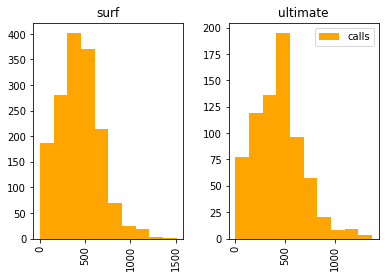

In [55]:
final_total.calls.hist(by=final_total['plan'], color='orange', label='calls')
plt.legend();

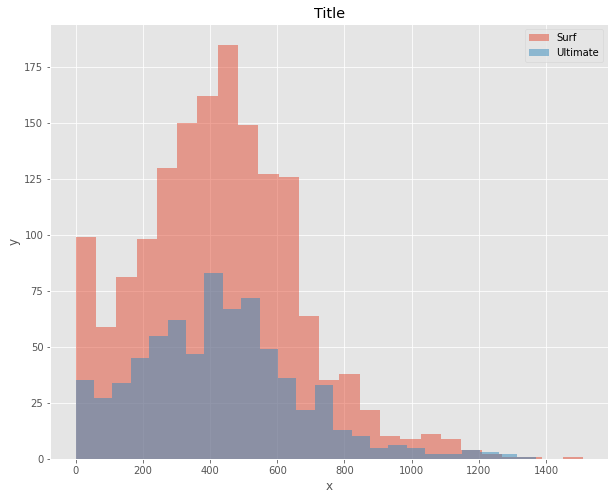

In [56]:
plt.style.use('ggplot') 

final_total.groupby('plan')['calls'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [57]:
final_total.groupby(['plan'])['gb_internet'].agg(['mean', 'median', 'std', 'var']).reset_index()

,plan,mean,median,std,var
0,surf,16.670693,17.0,7.847522,61.58360
1,ultimate,17.306944,17.0,7.670108,58.83055


As for internet,the histogram shows us that the mean and the median is also almost equall for 2 plans.

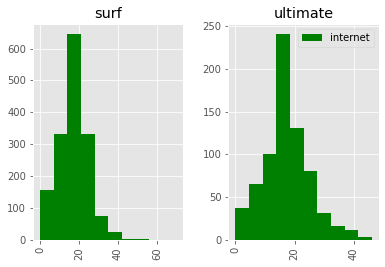

In [58]:
final_total.gb_internet.hist(by=final_total['plan'], color='green', label='internet')
plt.legend();

Reguarding to messages, the mean and the median are different for 2 plans. The histogram is skewed to the right, it has positive skew, mean is more than median

In [59]:
final_total.groupby(['plan'])['message'].agg(['mean', 'median', 'std', 'var']).reset_index()

,plan,mean,median,std,var
0,surf,31.159568,24.0,33.566717,1126.724522
1,ultimate,37.551389,30.0,34.767179,1208.756744


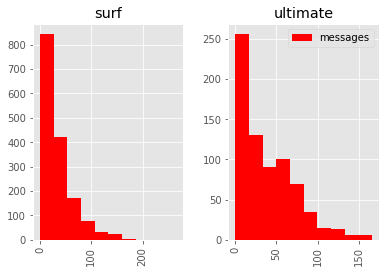

In [60]:
final_total.message.hist(by=final_total['plan'],color='red', label = 'messages')
plt.legend();

In [61]:
final_total.pivot_table(index='plan', values=['calls', 'message', 'gb_internet'],
                       aggfunc=['mean', 'std', 'var'])

mean                                std              \
               calls gb_internet    message       calls gb_internet   
plan                                                                  
surf      428.749523   16.670693  31.159568  234.453150    7.847522   
ultimate  430.450000   17.306944  37.551389  240.508762    7.670108   

                              var                           
            message         calls gb_internet      message  
plan                                                        
surf      33.566717  54968.279461    61.58360  1126.724522  
ultimate  34.767179  57844.464812    58.83055  1208.756744

In [62]:
l1 = ['calls', 'message', 'gb_internet']
l2 = ['mean', 'var', 'std']
idx = pd.MultiIndex.from_product([l1, l2])


print(idx)

print('\n\n\nIndex: ', idx[0], '1st: ', idx[0][0], '2nd: ', idx[0][1])

df = pd.DataFrame(index=['surf', 'ultimate'], columns=idx)

for i in df.columns:
    #  Slice on 1st index, agregate - on 2nd. 
    df.loc['surf',i] = np.round(final_total.query('plan=="surf"')[i[0]].agg(i[1]),2)
    df.loc['ultimate',i] = np.round(final_total.query('plan=="ultimate"')[i[0]].agg(i[1]),2)
    
df    

MultiIndex([(      'calls', 'mean'),
            (      'calls',  'var'),
            (      'calls',  'std'),
            (    'message', 'mean'),
            (    'message',  'var'),
            (    'message',  'std'),
            ('gb_internet', 'mean'),
            ('gb_internet',  'var'),
            ('gb_internet',  'std')],
           )



Index:  ('calls', 'mean') 1st:  calls 2nd:  mean


calls                   message                 gb_internet         \
            mean       var     std    mean      var    std        mean    var   
surf      428.75  54968.28  234.45   31.16  1126.72  33.57       16.67  61.58   
ultimate  430.45  57844.46  240.51   37.55  1208.76  34.77       17.31  58.83   

                
           std  
surf      7.85  
ultimate  7.67

It will be more convenient to see the behaviour of users of 2 different plans on one histogram. 

So here we also see that as for calls the distribution is normal, but there quantity of calls in surf plan is much higher

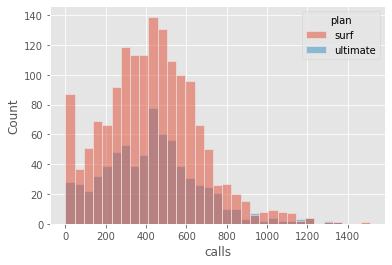

In [63]:
sns.histplot(final_total,x='calls', hue='plan');

The same situation is in internet group, we see the normal distribution, but the users of 20 gb internet are much hiegher in surf plan

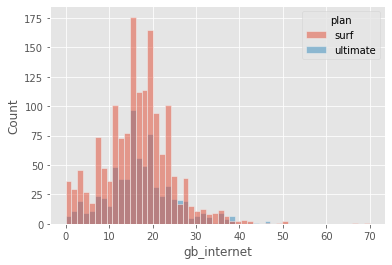

In [64]:
sns.histplot(final_total,x='gb_internet', hue='plan');

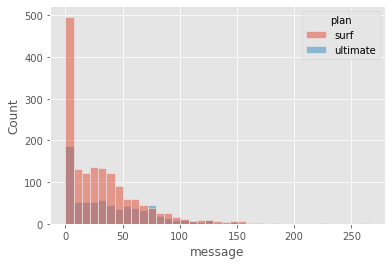

In [65]:
sns.histplot(final_total,x='message', hue='plan');

Now lets see the statistical data. We will calculate the mean, dispersion, and standard deviation and plot it on histograms for calls, messages and internet

In [66]:
package= final_total.groupby(['user_id','plan'])['calls', 'gb_internet','message'].mean().reset_index()
package

/tmp/ipykernel_64/1224858000.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  package= final_total.groupby(['user_id','plan'])['calls', 'gb_internet','message'].mean().reset_index()


,user_id,plan,calls,gb_internet,message
0,1000,ultimate,124.000000,2.000000,11.000000
1,1001,surf,345.600000,16.200000,41.400000
2,1002,surf,276.333333,13.666667,29.333333
3,1003,surf,1104.000000,27.000000,50.000000
4,1004,surf,346.500000,19.625000,22.125000
...,...,...,...,...,...
485,1495,surf,441.250000,24.750000,0.000000
486,1496,surf,291.000000,13.200000,13.000000
487,1497,ultimate,300.000000,11.000000,50.000000
488,1498,surf,291.909091,20.727273,0.000000


In [67]:
def package_stat(usage):
    fig, ax = plt.subplots(figsize=(7,6))
    ax = sns.histplot(package, x=usage, hue='plan')
    mean=package[usage].mean()
    std=package[usage].std()
    var=package[usage].var()
    cv=std/mean
    plt.show()
    print('Average is',mean)
    print(package.groupby(['plan'])[usage].mean())
    if cv>1:
            print('varies a lot')
    else:
         print('Centered around mean')

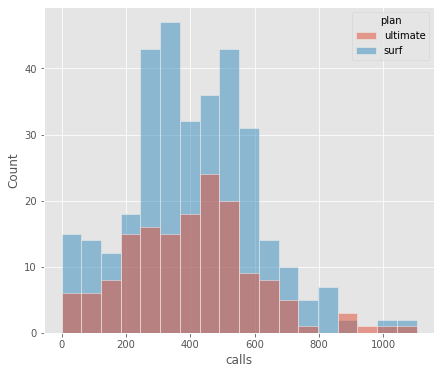

Average is 408.48802912506994
plan
surf        408.737038
ultimate    407.959877
Name: calls, dtype: float64
Centered around mean


In [68]:
package_stat('calls')

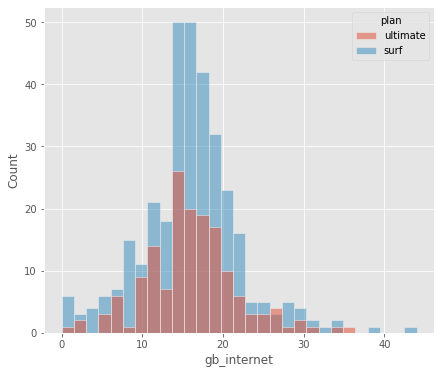

Average is 16.047551609388343
plan
surf        15.996965
ultimate    16.154847
Name: gb_internet, dtype: float64
Centered around mean


In [69]:
package_stat('gb_internet')

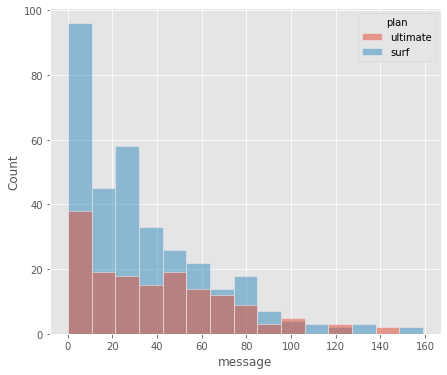

Average is 34.3514377742439
plan
surf        32.408931
ultimate    38.471532
Name: message, dtype: float64
Centered around mean


In [70]:
package_stat('message')

I also want to check what is going on with total_cost in different plans for megaline users

In [71]:
final_total['total_cost'].std()

46.62494533721031

In [72]:
final_total.groupby(['plan'])['total_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


From the table above we see that the standart deviation for surf is higher than for ultimate. 50% of surf users pay about 40 usd for their megaline package, that is twice more than it is neccesarry for their tarif (20USD). Also we see that there are twice more users in the surf plan than in the ultimate.

In [73]:
cv=final_total['total_cost'].std()/final_total['total_cost'].mean()
cv

0.7245394609616642

In [74]:
final_total.groupby(['plan'])['total_cost'].std()/final_total.groupby(['plan'])['total_cost'].mean()

plan
surf        0.912392
ultimate    0.157578
Name: total_cost, dtype: float64

As we grouped the data by plan and total cost, we see the the variation for surf plan is much more higher than the variation for ultimate plan.

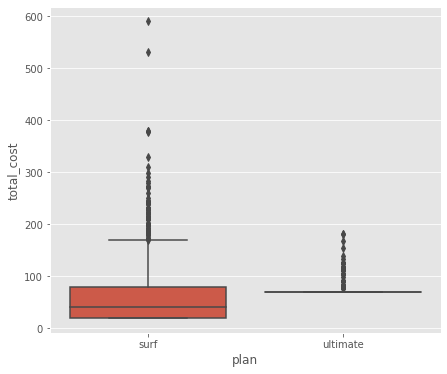

In [75]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.boxplot(x='plan', y='total_cost', data=final_total)

As we see in the boxplot there are much more outliers in the surf plan that in the ultimate and the total cost for the plan surf is really higher then the tarif they actually should pay...

#### Now let's move to the last step and test the hypotheses:
 
	The average revenue from users of Ultimate and Surf calling plans differs.
	The average revenue from users in NY-NJ area is different from that of the users from other regions.
    
    We consider that the null hypothesis is effectively stating that a difference between comparing situation is equal to zero, that the 2 parameteres that we are comparing are equal. That's how I chose the H0 and the H1

##### We are going to check our hypothese
**H0 = the average revenue from users of Ultimate ans Surf calling plans are the same.\
H1 = the average revenue from users of Ultimate and Surf calling plans differs**

In [76]:
plans_costs = final_total[['user_id','plan', 'month', 'total_cost']]
plans_costs.head()

,user_id,plan,month,total_cost
0,1001,surf,8,20.00
1,1001,surf,9,20.00
2,1001,surf,10,90.09
3,1001,surf,11,60.00
4,1001,surf,12,60.00


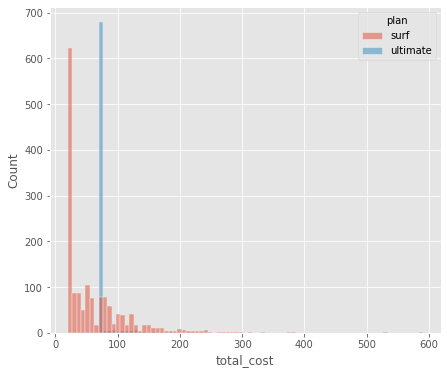

In [77]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.histplot(plans_costs, x= 'total_cost', hue='plan')

We see that the histogram is skewed to the right and that the majority of users in ultimate plan pay their 70 USD as it costs in a tarif, and the surf users pay more than there is in the tarif. There are also more customers in the surf tarif

In [78]:
plans_costs.groupby(['plan'])['total_cost'].median()

plan
surf        40.36
ultimate    70.00
Name: total_cost, dtype: float64

In [79]:
surf_plan=plans_costs.query('plan=="surf"')

In [80]:
ultimate_plan=plans_costs.query('plan=="ultimate"')

In [81]:
sample1=surf_plan['total_cost']

In [82]:
sample2=ultimate_plan['total_cost']

In [83]:
p_value = stats.ttest_ind(sample1, sample2)
p_value

Ttest_indResult(statistic=-5.568949166552807, pvalue=2.862674510698644e-08)

In [84]:
p_value = stats.ttest_ind(sample1, sample2).pvalue
p_value

2.862674510698644e-08

In [85]:
p_value = p_value.astype(int)
alpha=0.05
if p_value<alpha:
    print('Reject H0: average of sample 1 is not equal to average of sample 2')
else:
    print('Fail to reject H0: We do not have enough evidences to say the average sample 1 and sample 2 are not the same')

Reject H0: average of sample 1 is not equal to average of sample 2


##### Finally let's take a look at our users from NY and NJ region. Are they really differ from the others. 

**H0 = The average revenue from users in NY-NJ area is equal from that of the users from other regions\
H1 = The average revenue from users in NY-NJ area from that of the users from other regions differ**

In [86]:
megaline_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
372,1372,Patria,Kim,26,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-08,surf,NaN
41,1041,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",2018-03-17,ultimate,NaN
358,1358,Vaughn,Maldonado,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-26,surf,2018-10-22


In [87]:
region_totall = (pd.merge(plans_costs, megaline_users[['user_id','city']], how = 'left', on=['user_id'])).fillna('other')

In [88]:
region_totall = plans_costs.join(megaline_users.set_index('user_id')['city'], on='user_id')

In [89]:
region_totall.head()

,user_id,plan,month,total_cost,city
0,1001,surf,8,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
1,1001,surf,9,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,surf,10,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,surf,11,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,surf,12,60.00,"Seattle-Tacoma-Bellevue, WA MSA"


In [90]:
ny_nj_users = region_totall[region_totall['city'].str.contains("NY-NJ")]
ny_nj_users.head()

,user_id,plan,month,total_cost,city
42,1014,surf,11,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
43,1014,surf,12,38.84,"New York-Newark-Jersey City, NY-NJ-PA MSA"
61,1022,surf,5,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
62,1022,surf,6,100.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
63,1022,surf,7,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [91]:
not_ny_nj_users = region_totall[~region_totall['city'].str.contains("NY-NJ")]
not_ny_nj_users.head()

,user_id,plan,month,total_cost,city
0,1001,surf,8,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
1,1001,surf,9,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,surf,10,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,surf,11,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,surf,12,60.00,"Seattle-Tacoma-Bellevue, WA MSA"


In [92]:
ny_nj_sample = ny_nj_users['total_cost']

In [93]:
other_regions_sample = not_ny_nj_users['total_cost']

In [94]:
p_value = stats.ttest_ind(ny_nj_sample, other_regions_sample)
p_value

Ttest_indResult(statistic=-2.0194429818968103, pvalue=0.043557431621342436)

In [95]:
p_value = stats.ttest_ind(ny_nj_sample, other_regions_sample).pvalue
p_value

0.043557431621342436

In [96]:
# Reviewer's code

int(0.043557431621342436)

0

In [97]:
p_value = p_value.astype(int)
alpha=0.05
if p_value<alpha:
    print('Reject H0: average of sample 1 is not equal to average of sample 2')
else:
    print('Fail to reject H0: We do not have enough evidences to say the average sample 1 and sample 2 are not the same')

Reject H0: average of sample 1 is not equal to average of sample 2


# Conclusion


We've studied the data of the megaline company, their users, their plan differences, the differences between customers behaviour within surf and ultimate plans. What we found out that there are more users that are in the surf plan than in the ultimate. The surf users write more messages that the ultimate. There is difference between revenue from the surf and the ultimate , the surf is more profitable. The users from NY and NJ brings different revenue to company than the customers from the different regions.


There is difference between the first and the fixed version, the mean revenue in the surf plan decreased to 40USD( 43 was in the 1 version) But, I still think we should promote this plan as it brings more that the ultimate plan.